In [20]:
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

Perpare training data of input from 1 to 900 

In [2]:
X = [i for i in range(1, 900, 3)]
Y = []
for i in X:
    Y.append(math.sqrt(i))
X = np.array(X).reshape(-1,1)
Y = np.array(Y)

shuffle both Input and Target Variable

In [3]:
indices = np.random.permutation(len(X))

# Shuffle X and Y using the permutation
X = X[indices]
Y = Y[indices]

Train Random Forest model

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators= 10, max_depth=4, random_state=0)
rf_model.fit(X, Y)

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=0)

In [5]:
len(X)

300

Prepare Neural Network Model Architecture

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model = keras.Sequential([
    layers.Dense(64, input_dim=1, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='relu'),
    ])

model.compile(loss='mse',
            optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mean_absolute_percentage_error'])
#model.compile(optimizer='SGD', loss='MSE')

In [26]:
for layer in model.layers:
    print(layer.get_weights())

[array([[-0.07748589, -0.03815034,  0.259547  , -0.07494351, -0.06465553,
        -0.16109893, -0.20466746, -0.27081454,  0.01259884, -0.18745902,
        -0.15508   ,  0.22163731, -0.13610208,  0.25487167, -0.07292876,
         0.14608958,  0.19766843,  0.16006213, -0.07363038,  0.16678992,
         0.160463  , -0.18232326, -0.25052893, -0.03557399,  0.17423317,
        -0.00773799, -0.05046844, -0.27065352, -0.05110782,  0.25850534,
         0.08175626, -0.15577164,  0.08460164,  0.16213259, -0.067091  ,
         0.2977671 ,  0.02410537, -0.02399671,  0.19004256,  0.19938618,
        -0.08352748,  0.11868757, -0.10184819, -0.2579366 , -0.11975817,
        -0.16247219,  0.2676071 ,  0.2722686 ,  0.2064814 ,  0.06621799,
        -0.18940309,  0.07979599, -0.14187138, -0.23609242, -0.27305508,
         0.03945434,  0.02242684, -0.12353988, -0.05618818,  0.09480423,
        -0.0534482 , -0.11252747,  0.15181565,  0.2309016 ]],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 

In [15]:
history = model.fit(
    X,Y,validation_split=0.1,batch_size=5, shuffle=True,verbose=1, epochs=100, callbacks=[early_stopping])

Epoch 1/100
54/54 [==============================] - 0s 2ms/step - loss: 32.3285 - mean_absolute_percentage_error: 30.3624 - val_loss: 23.7842 - val_mean_absolute_percentage_error: 30.4687
Epoch 2/100
54/54 [==============================] - 0s 660us/step - loss: 18.6613 - mean_absolute_percentage_error: 25.5628 - val_loss: 24.0447 - val_mean_absolute_percentage_error: 30.3129
Epoch 3/100
54/54 [==============================] - 0s 552us/step - loss: 22.1888 - mean_absolute_percentage_error: 26.2836 - val_loss: 27.3850 - val_mean_absolute_percentage_error: 25.6003
Epoch 4/100
54/54 [==============================] - 0s 566us/step - loss: 23.8322 - mean_absolute_percentage_error: 26.4782 - val_loss: 17.5548 - val_mean_absolute_percentage_error: 24.0361
Epoch 5/100
54/54 [==============================] - 0s 567us/step - loss: 17.9923 - mean_absolute_percentage_error: 23.5497 - val_loss: 29.9497 - val_mean_absolute_percentage_error: 33.0729
Epoch 6/100
54/54 [============================

Fit Neural Network Model

In [9]:
history = model.fit(
    X,Y,validation_split=0.1,batch_size=5, shuffle=True,verbose=1, epochs=100, callbacks=[early_stopping])

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7153 - root_mean_squared_error: 0.8599 - val_loss: 5.0567 - val_root_mean_squared_error: 1.4502
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1366 - root_mean_squared_error: 0.8731 - val_loss: 1.5636 - val_root_mean_squared_error: 0.3350
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4186 - root_mean_squared_error: 0.7178 - val_loss: 4.9112 - val_root_mean_squared_error: 1.5097
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4498 - root_mean_squared_error: 1.0201 - val_loss: 1.1854 - val_root_mean_squared_error: 0.3562
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9491 - root_mean_squared_error: 0.5455 - val_loss: 1.1116 - val_root_mean_squared_error: 0.2664
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2988 - root_mean_squared_error: 1.0310 - val_loss: 3.7785 - val_root_mean_squared_error: 0.9683
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

Prediction Plot for input 1 to 1500

47/47 [==============================] - 0s 269us/step


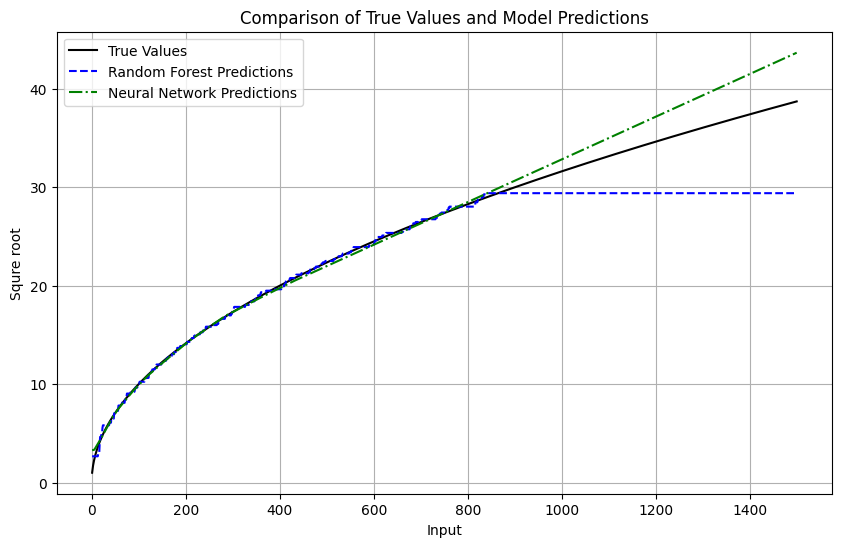

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
X_actual = np.array([i for i in range(1,1500)])
Y_actual = [math.sqrt(i) for i in X_actual]
Y_pred_rf = rf_model.predict(X_actual.reshape(-1,1))  # Predictions from random forest
Y_pred_nn = model.predict(X_actual.reshape(-1,1))  # Predictions from neural network

# Plot
plt.figure(figsize=(10, 6))

# Plot true values
plt.plot(X_actual, Y_actual, color='black', linestyle='-', label='True Values')

# Plot Random Forest predictions
plt.plot(X_actual, Y_pred_rf, color='blue', linestyle='--', label='Random Forest Predictions')

# Plot Neural Network predictions
plt.plot(X_actual, Y_pred_nn, color='green', linestyle='-.', label='Neural Network Predictions')

# Add labels and title
plt.xlabel('Input')
plt.ylabel('Squre root')
plt.title('Comparison of True Values and Model Predictions')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


RF model preiction is constant after 900. There is no input provided after 900 in training 

3/3 [==============================] - 0s 688us/step


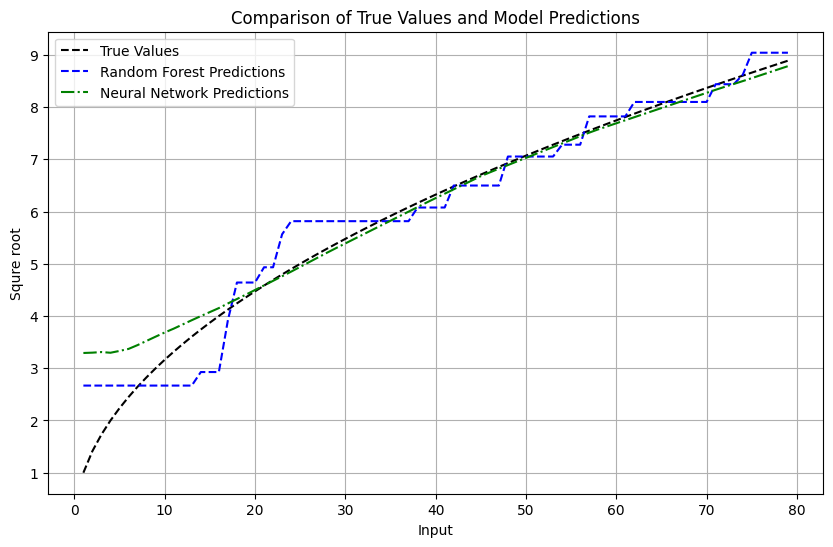

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
X_actual = np.array([i for i in range(1,80)])
Y_actual = [math.sqrt(i) for i in X_actual]
Y_pred_rf = rf_model.predict(X_actual.reshape(-1,1))  # Predictions from random forest
Y_pred_nn = model.predict(X_actual.reshape(-1,1))  # Predictions from neural network

# Plot
plt.figure(figsize=(10, 6))

# Plot true values
plt.plot(X_actual, Y_actual, color='black', linestyle='--', label='True Values')

# Plot Random Forest predictions
plt.plot(X_actual, Y_pred_rf, color='blue', linestyle='--', label='Random Forest Predictions')

# Plot Neural Network predictions
plt.plot(X_actual, Y_pred_nn, color='green', linestyle='-.', label='Neural Network Predictions')

# Add labels and title
plt.xlabel('Input')
plt.ylabel('Squre root')
plt.title('Comparison of True Values and Model Predictions')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
